In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os

In [3]:

def getData_half(cfileName):
    """
    Reads only the first half of the complex samples from a .cfile.
    The file is assumed to contain interleaved float32 I and Q samples.
    """
    # Get file size in bytes
    file_size = os.path.getsize(cfileName)
    # Determine total number of float32 samples in the file
    num_floats = file_size // 4
    # Each complex sample requires 2 floats.
    # The full complex array would have num_floats//2 elements.
    # To get only half of that, we need to read:
    count = (num_floats // 4) * 2  # (num_floats//4 complex samples)
    
    # Read only 'count' float32 numbers from the file
    data = np.fromfile(cfileName, dtype="float32", count=count)
    
    # Form complex samples: every pair (I, Q)
    data_complex = data[0::2] + 1j * data[1::2]
    
    return data_complex



In [7]:
def getData_one_sixth(cfileName):
    # Get file size in bytes.
    file_size = os.path.getsize(cfileName)
    # Each float32 is 4 bytes.
    num_floats = file_size // 4
    # Each complex sample consists of 2 floats.
    total_complex_samples = num_floats // 2
    # One-sixth of the complex samples.
    one_sixth_complex_samples = total_complex_samples // 6
    # Since each complex sample is 2 floats, calculate the count.
    count = one_sixth_complex_samples * 2
    # Read only the required number of float32 values.
    data = np.fromfile(cfileName, dtype="float32", count=count)
    # Convert to complex samples.
    complex_data = data[0::2] + 1j * data[1::2]
    return complex_data


In [4]:

fft_size = 2048  # FFT window size
fft_overlap = 125  # overlap between segments


In [5]:
original_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/autheticated_firemware/original")
print(original_half.shape)

(212153772,)


# Authenicated Code

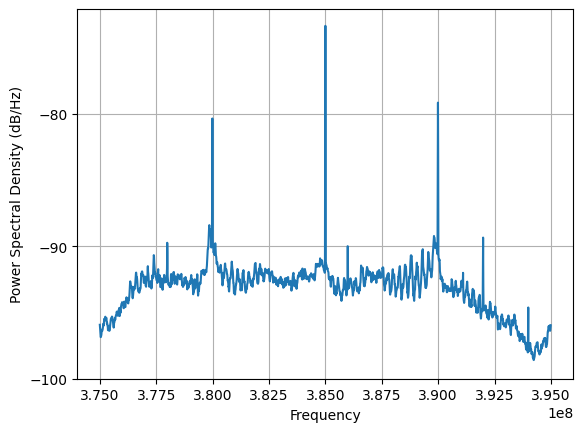

In [9]:
fig = plt.figure()
plt.psd(original_half, NFFT=fft_size, Fc=385e6, Fs=20e6)
plt.show()

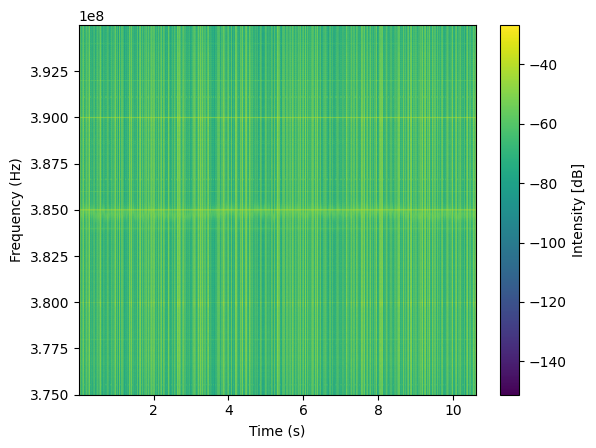

In [6]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(original_half, NFFT=fft_size, Fs=20e6, Fc=385e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del original_half

# Represent Unautheticated API

### Remove Random Generated number API

In [5]:
remove_rgn_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/remove_rgn")
print(remove_rgn_half.shape)

(211748722,)


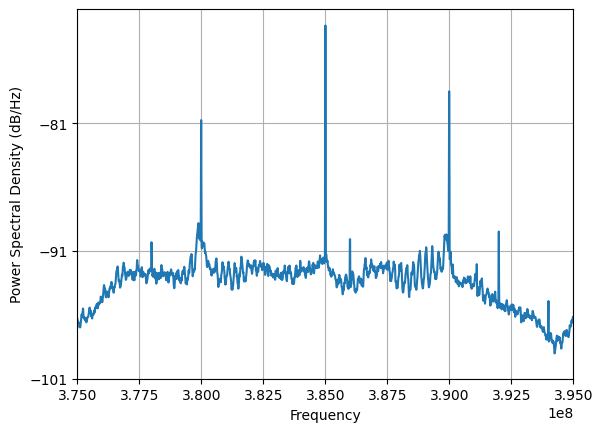

In [6]:
fig = plt.figure()
plt.psd(remove_rgn_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

### PING API

In [8]:
ping_first_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_first")
print(ping_first_half.shape)

(211288125,)


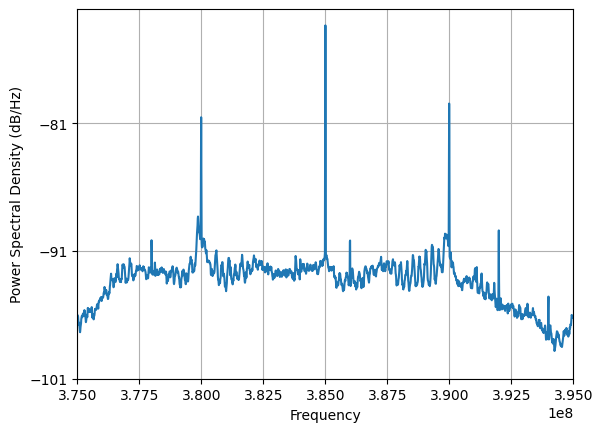

In [11]:
fig = plt.figure()
plt.psd(ping_first_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

In [9]:
ping_middle_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_middle")
print(ping_middle_half.shape)

(214828233,)


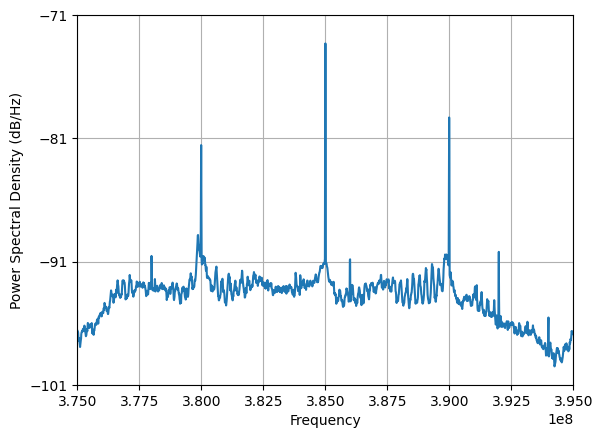

In [12]:
fig = plt.figure()
plt.psd(ping_middle_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

In [10]:
ping_last_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_last")
print(ping_last_half.shape)

(212337083,)


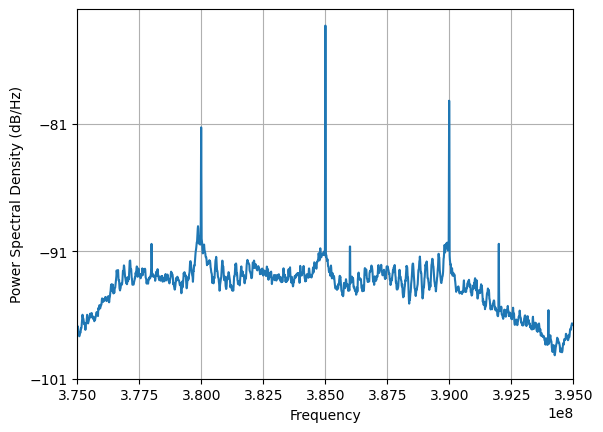

In [13]:
fig = plt.figure()
plt.psd(ping_last_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

# Info Gather API

In [14]:
info_gather_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/infoGather")
print(info_gather_half.shape)

(210503583,)


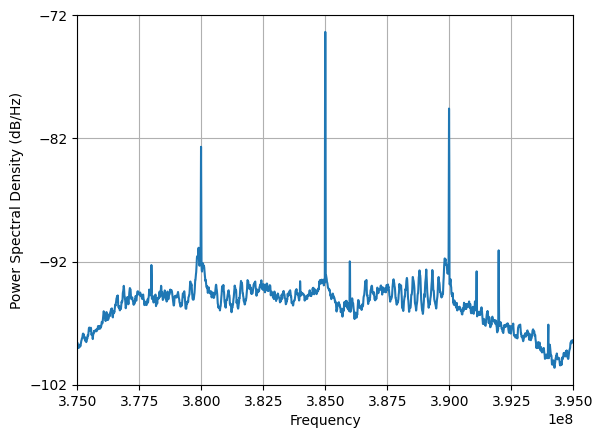

In [15]:
fig = plt.figure()
plt.psd(info_gather_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

# Update Weather API

In [16]:
update_weather_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/update_weatherRequest_different_payload")
print(update_weather_half.shape)

(212010598,)


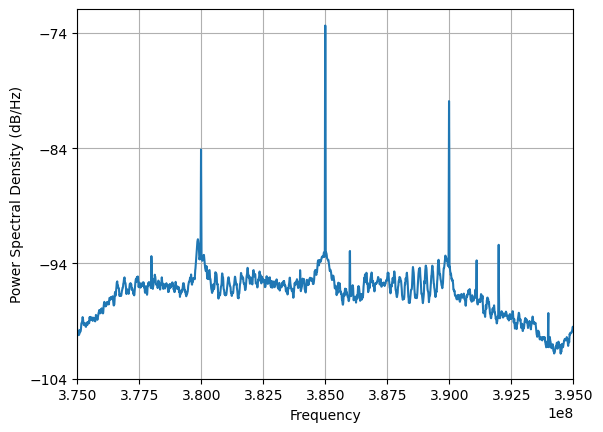

In [17]:
fig = plt.figure()
plt.psd(update_weather_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()